In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import os
import tensorflow as tf
from lib.methods import *
from lib.models import *
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Loading SIPI Dataset

SIPI dataset was preprocessed using prepare_dataset notebook, so these three folders already contain Detritus/Non-Detritus images.

Training: 70%
Validation: 15%
Testing: 15%

In [ ]:
DatasetName = '../../Detritus/Dataset-Detritus-Bubble'

train_dir = DatasetName+'/train'
validation_dir =  DatasetName+'/val'
test_dir = DatasetName+'/test'

test_all_class_dir = '../../Detritus/Dataset-Detritus-Bubble/test'
train_all_class_dir = 'Dataset-Detritus-Bubble/train'
val_all_class_dir = 'Dataset-Detritus-Bubble/val'

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

The three datasets are loaded using keras preprocessing method *image_dataset_from_directory*. Both the batch size and the image size hyperparameters where tested using different values. 

In [4]:
train_dataset = image_dataset_from_directory(train_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 38391 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(validation_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 8226 files belonging to 2 classes.
Found 8227 files belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(test_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE)

Found 8227 images belonging to 2 classes.


# Training

In [7]:
# Hyperparamers to be used in all models
base_learning_rate = 0.001
IMG_SHAPE = IMG_SIZE + (3,)
TRAINING_EPOCHS = 200


# Callback Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=20,
                                                mode="min",
                                               restore_best_weights=True)


In [8]:
model_A = get_model_A(0.0, True, 0.0)

# Custom CNN model

Training with Data Augmentation

Training model, epochs:  200
Epoch 1/200


2022-12-26 11:22:08.317913: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-26 11:22:08.338946: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2100000000 Hz


1200/1200 [==============================] - 187s 156ms/step - loss: 0.6798 - accuracy: 0.9976 - val_loss: 21.8382 - val_accuracy: 0.5361


2022-12-26 11:25:16.507988: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: .model_a_100/assets
Epoch 2/200
1200/1200 [==============================] - 177s 148ms/step - loss: 0.2418 - accuracy: 0.9576 - val_loss: 2.5378 - val_accuracy: 0.5361
INFO:tensorflow:Assets written to: .model_a_100/assets
Epoch 3/200
1200/1200 [==============================] - 175s 146ms/step - loss: 0.2398 - accuracy: 0.9234 - val_loss: 2.3466 - val_accuracy: 0.5361
INFO:tensorflow:Assets written to: .model_a_100/assets
Epoch 4/200
1200/1200 [==============================] - 175s 146ms/step - loss: 0.2156 - accuracy: 0.9326 - val_loss: 2.4414 - val_accuracy: 0.5361
Epoch 5/200
1200/1200 [==============================] - 173s 144ms/step - loss: 0.2010 - accuracy: 0.9384 - val_loss: 2.7129 - val_accuracy: 0.5361
Epoch 6/200
1200/1200 [==============================] - 172s 143ms/step - loss: 0.1700 - accuracy: 0.9526 - val_loss: 2.7946 - val_accuracy: 0.5361
Epoch 7/200
1200/1200 [==============================] - 171s 142ms/step - loss: 0.1580 - 

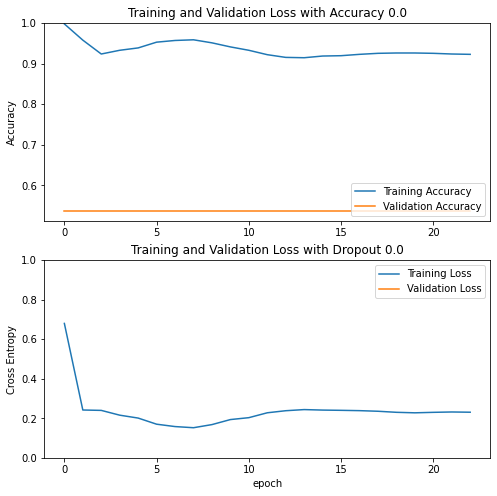

258/258 [==============================] - 9s 35ms/step - loss: 2.3390 - accuracy: 0.5376
Test accuracy : 0.5376200079917908


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.005s...
[t-SNE] Computed neighbors for 8227 samples in 1.603s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 118.386734
[t-SNE] KL divergence after 900 iterations: 3.134596


In [ ]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.model_a_100', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping]

model_A = get_model_A(0.0, True, 0.0)
history = train_model(model_A, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_A, test_dataset)
print_tsne(model_A, test_dataset, 2500)


In [ ]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.model_b_100', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping]

model_B = get_model_B(0.0, True, 0.0)
history = train_model(model_B, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_B, test_dataset)
print_tsne(model_B, test_dataset, 2500)


In [ ]:
def get_mobile_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inputs = tf.keras.Input(shape=IMG_SHAPE)
    
    if data_aug:
        dag = data_augmentation(inputs)
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(dag)
    else:
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
    
    x = base_model(processed_input)
    
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    
    x = global_average_layer(x)
    
    if drop_value > 0:
        x = keras.layers.Dropout(drop_value)(x)
    
    if l2_reg > 0:
        x = keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
                bias_regularizer=regularizers.l2(l2_reg),
                activity_regularizer=regularizers.l2(l2_reg))(x)
    else:
        x = keras.layers.Dense(1)(x)
    return keras.Model(inputs, x)

# MobileNetV2 Model From Scratch

In [ ]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mobile_net_scratch_100', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping]

base_learning_rate = 0.0001
mobileNetModelSc = get_mobile_net(0.0, True, 0.0)
history = train_model(mobileNetModelSc, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(mobileNetModelSc, test_dataset)
print_tsne(mobileNetModelSc, test_dataset, 2500)

# DenseNet model

In [ ]:
def show_plot(acc, val_acc, loss, val_loss):
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [ ]:
IMG_SHAPE

In [ ]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.dense_net_ft_100', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping]

def do_transfer_learning(drop_value=0.0, data_aug=False, l2_reg=0.0, input_model=None, base_model=None):
    dense_model = input_model
    dense_base_model = base_model
    if (input_model is None):
        dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

        dense_base_model.trainable = False

        dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
        dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
        dense_prediction_layer = tf.keras.layers.Dense(1)

        dense_inputs = tf.keras.Input(shape=IMG_SHAPE)
        if data_aug:
            dag = data_augmentation(dense_inputs)
            dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
        else:
            dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
        dense_x = dense_base_model(dense_x, training=False)
        dense_x = dense_global_average_layer(dense_x)
        if drop_value > 0:
            dense_x = keras.layers.Dropout(drop_value)(dense_x)
        dense_outputs = dense_prediction_layer(dense_x)
        dense_model = tf.keras.Model(dense_inputs, dense_outputs)

    dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    dense_history = dense_model.fit(train_dataset,
                    epochs=TRAINING_EPOCHS,
                    validation_data=validation_dataset,
                    callbacks=callbacks)
    
    acc = dense_history.history['accuracy']
    val_acc = dense_history.history['val_accuracy']

    loss = dense_history.history['loss']
    val_loss = dense_history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title("Training and Validation Accuracy with Dropout {0}".format(drop_value))

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title("Training and Validation Loss with Dropout {0}".format(drop_value))
    plt.xlabel('epoch')
    plt.show()
    
    dense_base_model.trainable = True
    
    dense_fine_tune_at = 660
    
    for layer in dense_base_model.layers[:dense_fine_tune_at]:
        layer.trainable =  False
        
    dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])
    
    total_epochs =  TRAINING_EPOCHS + TRAINING_EPOCHS

    dense_history_fine = dense_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=dense_history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=callbacks)
    
    acc += dense_history_fine.history['accuracy']
    val_acc += dense_history_fine.history['val_accuracy']

    loss += dense_history_fine.history['loss']
    val_loss += dense_history_fine.history['val_loss']
    
    show_plot(acc, val_acc, loss, val_loss)
    
    loss, accuracy = dense_model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    
    print_tsne(dense_model, test_dataset, 2500)

In [ ]:
def get_dense_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

    dense_base_model.trainable = False

    dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
    dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    dense_prediction_layer = tf.keras.layers.Dense(1)

    dense_inputs = tf.keras.Input(shape=IMG_SHAPE)
    if data_aug:
        dag = data_augmentation(dense_inputs)
        dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
    else:
        dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
    dense_x = dense_base_model(dense_x, training=False)
    dense_x = dense_global_average_layer(dense_x)
    if drop_value > 0:
        dense_x = keras.layers.Dropout(drop_value)(dense_x)
    dense_outputs = dense_prediction_layer(dense_x)
    dense_model = tf.keras.Model(dense_inputs, dense_outputs)
    return dense_base_model, dense_model

In [ ]:
TRAINING_EPOCHS=100

In [ ]:
base_dense_model, denseNetModel = get_dense_net(0.0, True, 0.0)
do_transfer_learning(0.0, True, 0.0)

In [ ]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
          
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")

# Inception Resnet V2 Fine Tuning 

In [ ]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.inception_resnet_v2_100', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping]

def do_transfer_learning(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inception_resnet_base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

    inception_resnet_base_model.trainable = False

    ir_preprocess_input = tf.keras.applications.inception_resnet_v2.preprocess_input
    ir_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    ir_prediction_layer = tf.keras.layers.Dense(1)

    ir_inputs = tf.keras.Input(shape=IMG_SHAPE)
    if data_aug:
        dag = data_augmentation(ir_inputs)
        ir_x =  tf.keras.applications.inception_resnet_v2.preprocess_input(dag)
    else:
        ir_x =  tf.keras.applications.inception_resnet_v2.preprocess_input(ir_inputs)
    ir_x = inception_resnet_base_model(ir_x, training=False)
    ir_x = ir_global_average_layer(ir_x)
    if drop_value > 0:
        ir_x = keras.layers.Dropout(drop_value)(ir_x)
    ir_outputs = ir_prediction_layer(ir_x)
    ir_model = tf.keras.Model(ir_inputs, ir_outputs)
    
    ir_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    ir_history = ir_model.fit(train_dataset,
                    epochs=TRAINING_EPOCHS,
                    validation_data=validation_dataset,
                    callbacks=callbacks)
    
    acc = ir_history.history['accuracy']
    val_acc = ir_history.history['val_accuracy']

    loss = ir_history.history['loss']
    val_loss = ir_history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title("Training and Validation Accuracy with Dropout {0}".format(drop_value))

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title("Training and Validation Loss with Dropout {0}".format(drop_value))
    plt.xlabel('epoch')
    plt.show()
    
    inception_resnet_base_model.trainable = True
    
    ir_fine_tune_at = 755
    
    for layer in inception_resnet_base_model.layers[:ir_fine_tune_at]:
        layer.trainable =  False
        
    ir_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])
    
    total_epochs =  TRAINING_EPOCHS + TRAINING_EPOCHS

    ir_history_fine = ir_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=ir_history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=callbacks)
    
    acc += ir_history_fine.history['accuracy']
    val_acc += ir_history_fine.history['val_accuracy']

    loss += ir_history_fine.history['loss']
    val_loss += ir_history_fine.history['val_loss']
    
    show_plot(acc, val_acc, loss, val_loss)
    
    loss, accuracy = ir_model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    print_tsne(ir_model, test_dataset, 2500)
    

In [ ]:
do_transfer_learning(0.0, True, 0.0)